# Part 1. Hypothesis Testing

## Libraries

For today's demo, we'll be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes**, since it has some nice characteristics for linear modeling. 

We will be demostrating *hypothesis testing* as it relates to linear modeling. We'll dive into how to do linear regression models in later classes. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [4]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


#### Question: What are the **features** / **predictors**?

Answer: 


#### Question: What is the response?

Answer:

#### Question: How many observations are there?

Answer:

#### Question: What type of data set are we looking at (time series, cross section, panel)?

Answer:

#### Question: What are the variable data types?

Answer:

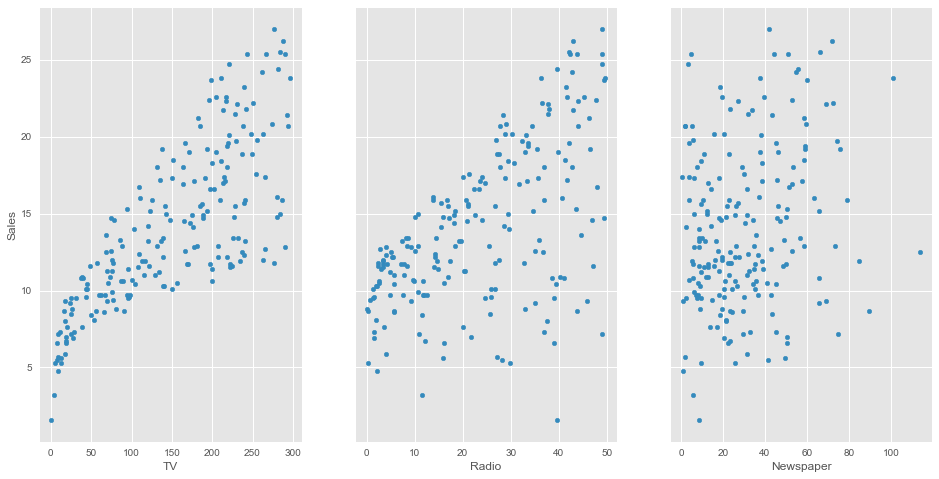

In [5]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2]);

In [6]:
data_long = pd.melt(frame=data, 
                        id_vars=['Sales'],
                        value_vars=['TV', 'Radio', 'Newspaper'], 
                        value_name='Ad Spend', var_name='Channel')
data_long.head(3)

,Sales,Channel,Ad Spend
0,22.1,TV,230.1
1,10.4,TV,44.5
2,9.3,TV,17.2


In [7]:
sns.lmplot

<function seaborn.linearmodels.lmplot>

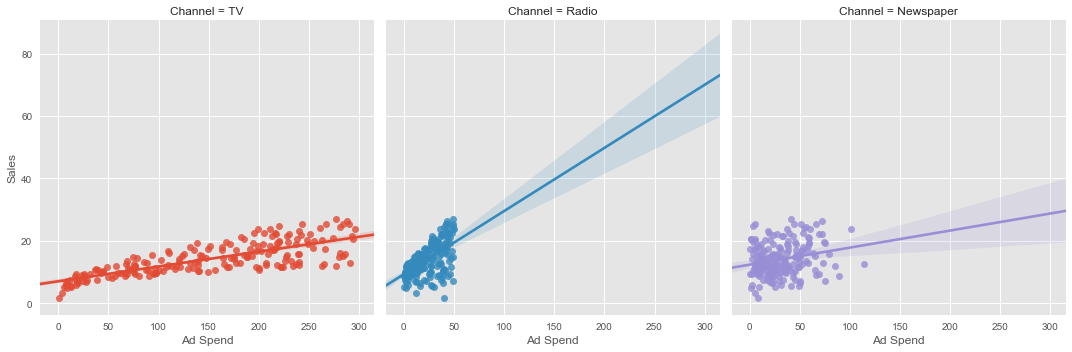

In [8]:
sns.lmplot(data=data_long,
           x='Ad Spend', y='Sales',
          col='Channel', hue='Channel');

## Questions about the Advertising Data

Let's pretend you work for the company that manufactures and markets this new device. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

#### Question: How would you describe the relationship between ads and sales?

Answer: They are positively correlated.

#### Question: Is this a causal relationship? 

Answer: Not necessarily. Would need to test other possibly correlated factors, make more experimental, establish control/experimental group to evaluate if there a higher prevelance of purchases for people who interacted w ad vs. those who did not. 

#### Question: What other information might we want to obtain?

Answer: Time, geo, demographic, product, business model, economic factors.


### Our first Regression Model!

Let's use **Statsmodels** to estimate the association between TV advertising expenditure and sales. 

In [9]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

In [10]:
# create a fitted model in one line
# formula notification is the equivalent to writing out our models such that 'outcome = predictor'
# with the follwing syntax: formula = 'outcome ~ predictor1 + predictor2 ... predictorN'
linear_model = smf.ols(formula='Sales ~ TV', data=data).fit()

In [11]:
#print the full summary
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 02 Aug 2017   Prob (F-statistic):           1.47e-42
Time:                        20:20:43   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# print the coefficients
linear_model.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50000$$

In [19]:
# manually calculate the prediction
7.032594 + 0.047537*50000

2383.882594

Thus, we would predict Sales of **2,383 widgets** in that market.

Of course, we can also use Statsmodels to make the prediction:

In [20]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50000]})
X_new.head()

,TV
0,50000


In [21]:
# use the model to make predictions on a new value
linear_model.predict(X_new)

0    2383.864615
dtype: float64

# Part 2. Confidence in our Model

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [23]:
# print the confidence intervals for the model coefficients
linear_model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** - a hypothesis that is the opposite of the null. Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

Note that "failing to reject" the null is ***not*** the same as "accepting" the null hypothesis. Your alternative hypothesis may indeed be true, but you don't necessarily have enough data to show that yet. 

As it relates to model coefficients, here is the conventional hypothesis test:

- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? We reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. 

Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [24]:
pd.options.display.float_format = lambda x: '{:,.40f}'.format(x)
# print the p-values for the model coefficients
linear_model.pvalues

Intercept   0.0000000000000000000000000000000000140630
TV          0.0000000000000000000000000000000000000000
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. 

If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. Using 0.05 as the cutoff is a standard convention.

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.

- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.